In [1]:
import os
import numpy  as np
import tables as tb

import matplotlib.pyplot as plt

from   invisible_cities.core.core_functions import in_range
import invisible_cities.core.fit_functions  as fitf
from invisible_cities.core.core_functions import shift_to_bin_centers

from   invisible_cities.reco import tbl_functions as tbl

In [2]:
plt.rcParams["font.size"] = 15

In [3]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_z_map/mix_FBK_Hamamatsu/'

thr_ch_start  = 0
thr_ch_nsteps = 6

true_z1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x1_all  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge1_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts1_all   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

true_z1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x1  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge1 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts1   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

true_z2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x2_all  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge2_all = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts2_all   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

true_z2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_x2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
true_y2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
var_x2  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
charge2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
evts2   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

for filename in os.listdir(evts_path):
    if filename.endswith('.npz'):
        my_file = evts_path+filename        
        d = np.load(my_file, allow_pickle=True)
        for j in range(thr_ch_start, thr_ch_nsteps):
            for i in d[f'true_z1_all_{j}']:
                true_z1_all[j].append(i)
            for i in d[f'true_x1_all_{j}']:
                true_x1_all[j].append(i)
            for i in d[f'true_y1_all_{j}']:
                true_y1_all[j].append(i)
            for i in d[f'var_x1_all_{j}']:
                var_x1_all[j].append(i)
            for i in d[f'charge1_all_{j}']:
                charge1_all[j].append(i)
            for i in d[f'evts1_all_{j}']:
                evts1_all[j].append(i)
                
            for i in d[f'true_z1_{j}']:
                true_z1[j].append(i)    
            for i in d[f'true_x1_{j}']:
                true_x1[j].append(i)
            for i in d[f'true_y1_{j}']:
                true_y1[j].append(i)
            for i in d[f'var_x1_{j}']:
                var_x1[j].append(i)
            for i in d[f'charge1_{j}']:
                charge1[j].append(i)
            for i in d[f'evts1_{j}']:
                evts1[j].append(i)

            for i in d[f'true_z2_all_{j}']:
                true_z2_all[j].append(i)
            for i in d[f'true_x2_all_{j}']:
                true_x2_all[j].append(i)
            for i in d[f'true_y2_all_{j}']:
                true_y2_all[j].append(i)
            for i in d[f'var_x2_all_{j}']:
                var_x2_all[j].append(i)
            for i in d[f'charge2_all_{j}']:
                charge2_all[j].append(i)
            for i in d[f'evts2_all_{j}']:
                evts2_all[j].append(i)

            for i in d[f'true_z2_{j}']:
                true_z2[j].append(i)
            for i in d[f'true_x2_{j}']:
                true_x2[j].append(i)
            for i in d[f'true_y2_{j}']:
                true_y2[j].append(i)
            for i in d[f'var_x2_{j}']:
                var_x2[j].append(i)
            for i in d[f'charge2_{j}']:
                charge2[j].append(i)
            for i in d[f'evts2_{j}']:
                evts2[j].append(i)
            
true_z1_all_a = np.array([np.array(i) for i in true_z1_all])
true_x1_all_a = np.array([np.array(i) for i in true_x1_all])
true_y1_all_a = np.array([np.array(i) for i in true_y1_all])
var_x1_all_a  = np.array([np.array(i) for i in var_x1_all ])
charge1_all_a = np.array([np.array(i) for i in charge1_all])
evts1_all_a   = np.array([np.array(i) for i in evts1_all  ])
true_z1_a     = np.array([np.array(i) for i in true_z1    ])
true_x1_a     = np.array([np.array(i) for i in true_x1    ])
true_y1_a     = np.array([np.array(i) for i in true_y1    ])
var_x1_a      = np.array([np.array(i) for i in var_x1     ])
charge1_a     = np.array([np.array(i) for i in charge1    ])
evts1_a       = np.array([np.array(i) for i in evts1      ])
true_z2_all_a = np.array([np.array(i) for i in true_z2_all])
true_x2_all_a = np.array([np.array(i) for i in true_x2_all])
true_y2_all_a = np.array([np.array(i) for i in true_y2_all])
var_x2_all_a  = np.array([np.array(i) for i in var_x2_all ])
charge2_all_a = np.array([np.array(i) for i in charge2_all])
evts2_all_a   = np.array([np.array(i) for i in evts2_all  ])
true_z2_a     = np.array([np.array(i) for i in true_z2    ])
true_x2_a     = np.array([np.array(i) for i in true_x2    ])
true_y2_a     = np.array([np.array(i) for i in true_y2    ])
var_x2_a      = np.array([np.array(i) for i in var_x2     ])
charge2_a     = np.array([np.array(i) for i in charge2    ])
evts2_a       = np.array([np.array(i) for i in evts2      ])

## Some plots

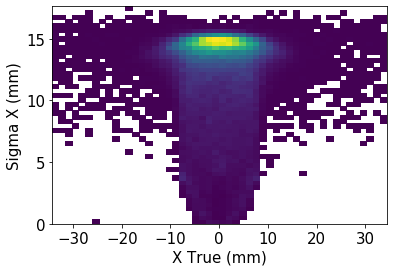

In [4]:
bins   = 50
plt.hist2d(true_x1_a[j], np.sqrt(var_x1_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('X True (mm)')
plt.ylabel('Sigma X (mm)');

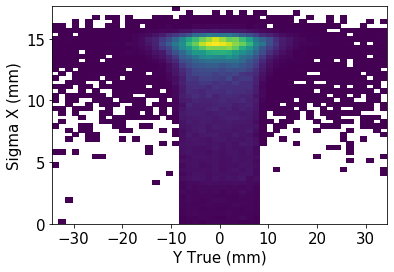

In [5]:
bins   = 50
plt.hist2d(true_y1_a[j], np.sqrt(var_x1_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

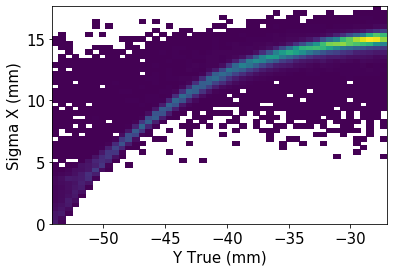

In [6]:
bins   = 50
plt.hist2d(true_z1_a[j], np.sqrt(var_x1_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

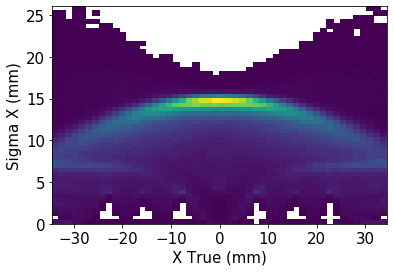

In [7]:
bins   = 50
plt.hist2d(true_x1_all_a[j], np.sqrt(var_x1_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('X True (mm)')
plt.ylabel('Sigma X (mm)');

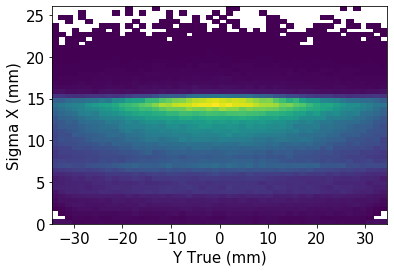

In [8]:
bins   = 50
plt.hist2d(true_y1_all_a[j], np.sqrt(var_x1_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

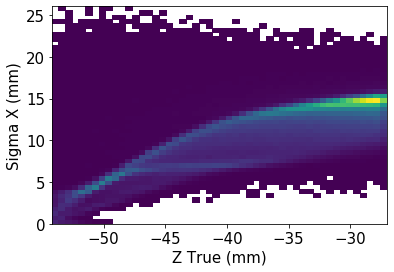

In [9]:
bins   = 50
plt.hist2d(true_z1_all_a[j], np.sqrt(var_x1_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Z True (mm)')
plt.ylabel('Sigma X (mm)');

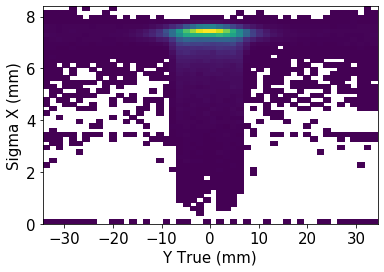

In [10]:
bins   = 50
plt.hist2d(true_x2_a[j], np.sqrt(var_x2_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

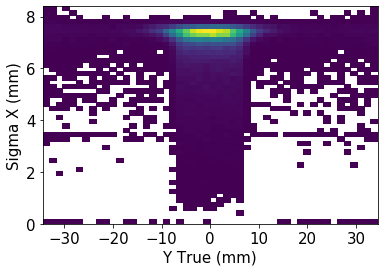

In [11]:
bins   = 50
plt.hist2d(true_y2_a[j], np.sqrt(var_x2_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

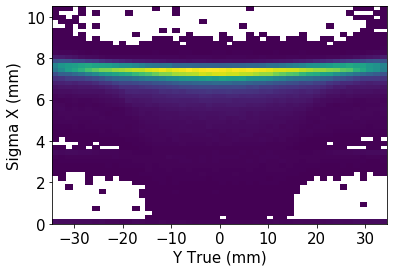

In [12]:
bins   = 50
plt.hist2d(true_y2_all_a[j], np.sqrt(var_x2_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Y True (mm)')
plt.ylabel('Sigma X (mm)');

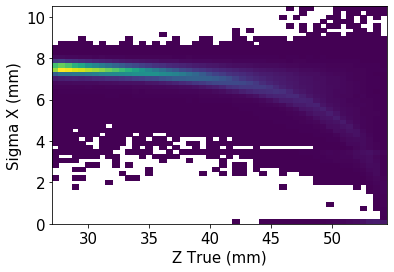

In [13]:
bins   = 50
plt.hist2d(true_z2_all_a[j], np.sqrt(var_x2_all_a[j]), bins=(bins, bins), cmin=1)
plt.xlabel('Z True (mm)')
plt.ylabel('Sigma X (mm)');

## Charge:

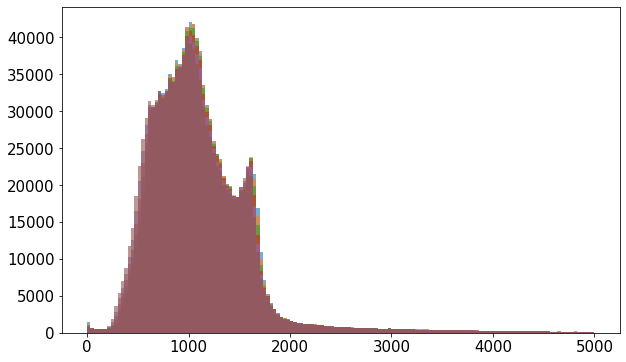

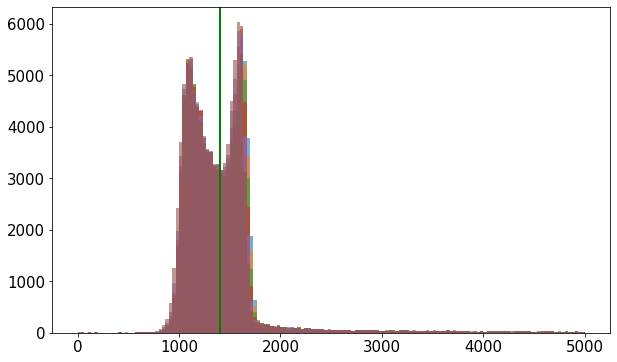

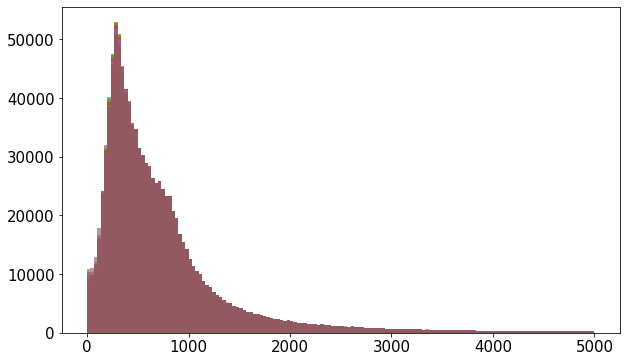

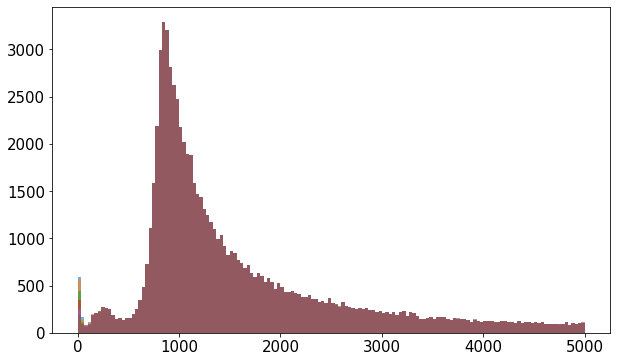

In [14]:
plt.rcParams["figure.figsize"] = 10, 6
for i in range(thr_ch_start, thr_ch_nsteps):
    plt.hist(charge1_all_a[i], 150, (0, 5000), alpha=0.6)
plt.show()
for i in range(thr_ch_start, thr_ch_nsteps):
    plt.hist(charge1_a[i], 150, (0, 5000), alpha=0.6)
    plt.axvline(x=1400, c='g')
plt.show()
for i in range(thr_ch_start, thr_ch_nsteps):
    plt.hist(charge2_all_a[i], 150, (0, 5000), alpha=0.6)
plt.show()
for i in range(thr_ch_start, thr_ch_nsteps):
    plt.hist(charge2_a[i], 150, (0, 5000), alpha=0.6)
plt.show()

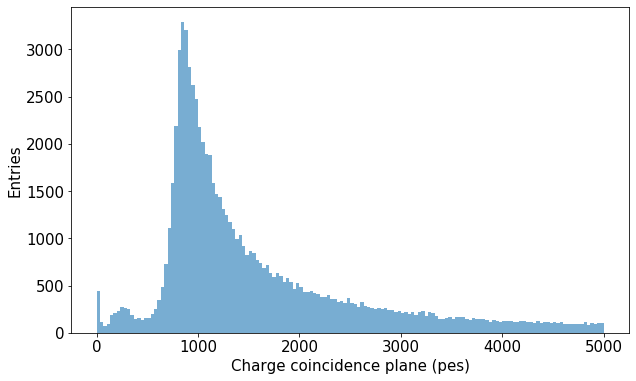

In [15]:
plt.hist(charge2_a[2], 150, (0, 5000), alpha=0.6)
plt.xlabel('Charge coincidence plane (pes)')
plt.ylabel('Entries')
plt.show()

In [16]:
charge2_a[0].shape

(79743,)

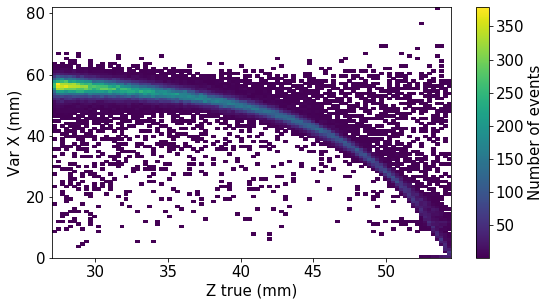

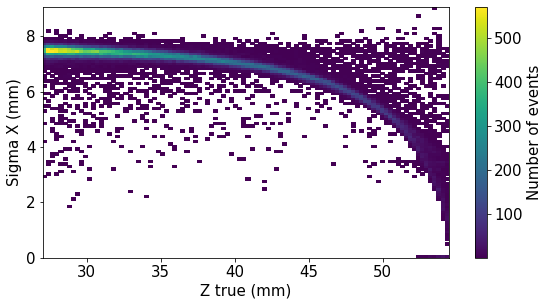

In [17]:
bins   = 100

#for j in range(thr_ch_start, thr_ch_nsteps):
plt.rcParams["figure.figsize"] = 8, 4.5
plt.hist2d(true_z2_a[2], var_x2_a[2], bins=(bins, bins), cmin=1)
plt.xlabel('Z true (mm)')
plt.ylabel('Var X (mm)')
plt.colorbar().set_label("Number of events")
plt.tight_layout()
plt.show()

#for j in range(thr_ch_start, thr_ch_nsteps):
plt.rcParams["figure.figsize"] = 8, 4.5
plt.hist2d(true_z2_a[2], np.sqrt(var_x2_a[2]), bins=(bins, bins), cmin=1)
plt.xlabel('Z true (mm)')
plt.ylabel('Sigma X (mm)')
plt.colorbar().set_label("Number of events")
plt.tight_layout()
plt.show()


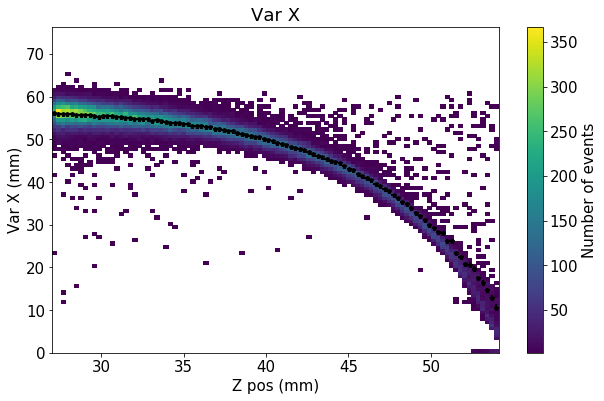

In [18]:
z_lim, varx_lim = (27., 54.1), (0, 80)
Zbins, Vbins = 100, 100

thr  = 2
sel2 = in_range(true_z2_a[thr], *z_lim) & in_range(var_x2_a[thr], *varx_lim)
z, v = true_z2_a[thr][sel2], var_x2_a[thr][sel2]

plt.rcParams["figure.figsize"] = 10, 6
plt.hist2d(z, v, (Zbins, Vbins), cmin=2)

x, y, yu = fitf.profileX(z, v, Zbins, z_lim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.title('Var X')
plt.xlabel('Z pos (mm)')
plt.ylabel('Var X (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

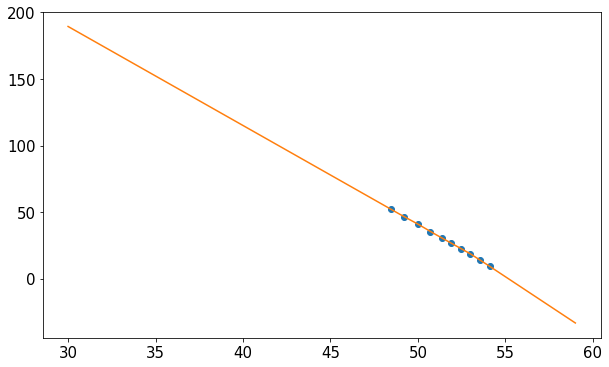

In [19]:
from scipy import interpolate

xvals = np.array([54.117647058823536, 53.529411764705884, 52.97058823529412, 52.441176470588246, 51.88235294117648, 51.352941176470594, 50.70588235294118, 50.029411764705884, 49.20588235294118, 48.47058823529412])
yvals = np.array([9.10898332168182, 14.222835314091682, 18.861130530310596, 22.191950464396285, 26.94909118146409, 30.874138619794266, 35.27526715270149, 40.74617996604414, 46.57450314591031, 52.0457655048437])
f0 = interpolate.interp1d(xvals, yvals, fill_value="extrapolate")
xnew0 = np.arange(30, 60)
ynew0 = f0(xnew0)   # use interpolation function returned by `interp1d`
plt.plot(xvals, yvals, 'o', xnew0, ynew0, '-')
plt.show()


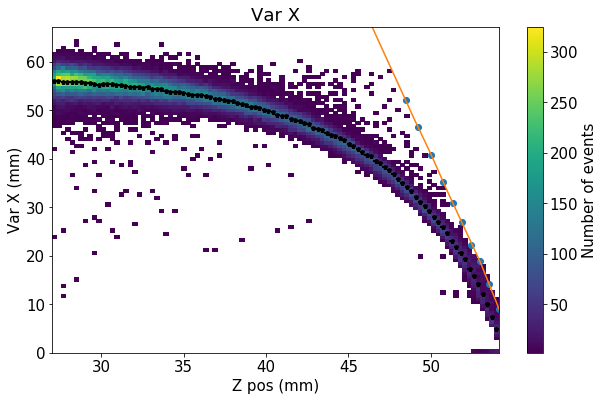

In [20]:
z_lim, varx_lim = (27., 54.1), (0, 80)
Zbins, Vbins = 100, 100

thr  = 2
sel2 = in_range(true_z2_a[thr], *z_lim) & in_range(var_x2_a[thr], *varx_lim)
z, v = true_z2_a[thr][sel2], var_x2_a[thr][sel2]
line = (v < f0(z))
z2, v2 = z[line], v[line]

plt.rcParams["figure.figsize"] = 10, 6
plt.hist2d(z2, v2, (Zbins, Vbins), cmin=2)

x, y, yu = fitf.profileX(z2, v2, Zbins, z_lim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.plot(xvals, yvals, 'o', xnew0, ynew0, '-')
plt.title('Var X')
plt.xlabel('Z pos (mm)')
plt.ylabel('Var X (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

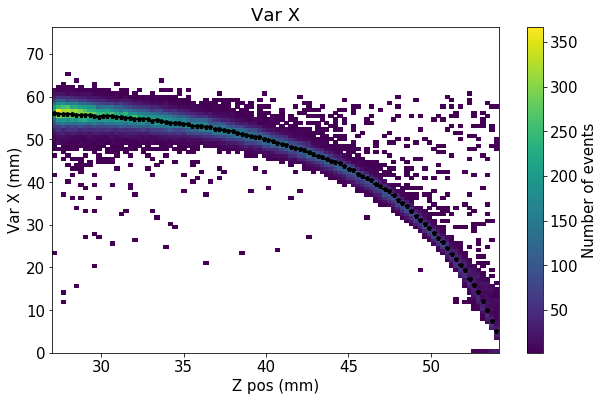

In [21]:
plt.rcParams["figure.figsize"] = 10, 6
plt.hist2d(z, v, (Zbins, Vbins), cmin=2)

x, y, yu = fitf.profileX(z2, v2, Zbins, z_lim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.title('Var X')
plt.xlabel('Z pos (mm)')
plt.ylabel('Var X (mm)')
plt.colorbar().set_label("Number of events")
plt.show()

## Create table:

In [22]:
ZnBins   = [50, 100, 150, 200]
ZRange   = (27.0, 54.1)
ZBins    = {n: np.linspace(*ZRange, n + 1) for n       in ZnBins}
ZCenters = {n: shift_to_bin_centers(bins)  for n, bins in ZBins.items()}
ZPitch   = {n: np.diff(bins)[0]            for n, bins in ZBins.items()}

In [23]:
thr  = 2
sel2 = in_range(true_z2_a[thr], *z_lim) & in_range(var_x2_a[thr], *varx_lim)
z, v = true_z2_a[thr][sel2], var_x2_a[thr][sel2]
line = (v < f0(z))
z2, v2 = z[line], v[line]

VarX_ave   = {}
VarX_ave_u = {} # uncertainty
for n in ZnBins:
    x, y, yu = fitf.profileX(z2, v2, n, xrange=z_lim, yrange=varx_lim, drop_nan=False)
    VarX_ave  [n] = y
    VarX_ave_u[n] = yu
    print(x, y, yu)

[27.271 27.813 28.355 28.897 29.439 29.981 30.523 31.065 31.607 32.149
 32.691 33.233 33.775 34.317 34.859 35.401 35.943 36.485 37.027 37.569
 38.111 38.653 39.195 39.737 40.279 40.821 41.363 41.905 42.447 42.989
 43.531 44.073 44.615 45.157 45.699 46.241 46.783 47.325 47.867 48.409
 48.951 49.493 50.035 50.577 51.119 51.661 52.203 52.745 53.287 53.829] [56.03179895 55.90508746 55.83093622 55.70130358 55.57008193 55.39096557
 55.34100437 55.17974846 54.97018332 54.78874378 54.70878443 54.4163422
 54.17285966 53.85984514 53.68000099 53.35018758 53.12937835 52.84288765
 52.35003988 52.04742241 51.69792854 51.17573811 50.64931236 50.2650359
 49.72882949 48.98844622 48.49885041 47.8870513  47.27531834 46.30815914
 45.61620938 44.8226676  44.08596238 42.87141335 41.72867002 40.6935449
 39.33953095 38.02031642 36.29624302 34.69668085 32.6901618  30.64113009
 28.69017766 26.38362472 23.95420454 21.23867843 18.34465505 15.04510947
 11.15550867  6.28080563] [0.05260649 0.05353402 0.05375298 0.0

In [24]:
path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/'
VarX_table_name = path+'z_var_x_table_pet_box_FBK_coinc_plane_cent.h5'

class ZposT(tb.IsDescription):
    Zpos            = tb.Float32Col(pos=0)
    Var_x           = tb.Float32Col(pos=0)
    VarXUncertainty = tb.Float32Col(pos=0)

with tb.open_file(VarX_table_name, "w") as output_file:
    
    if '/Zpos' in output_file:
        Zpos = output_file.root.Zpos        
    else:
        Zpos = output_file.create_group(output_file.root, "Zpos")
    
    for n in ZBins:
        pitch      = ZPitch[n]
        table_name = f"f{thr}pes{n}bins"

        z_table = output_file.create_table(Zpos, table_name,
                                           description = ZposT,
                                           title       = "z_pos",
                                           filters     = tbl.filters('ZLIB4'))
    
    
        for i, zs in enumerate(ZCenters[n], start=0):
            row                    = z_table.row
            row["Zpos"]            = zs
            row["Var_x"]           = VarX_ave  [n][i]
            row["VarXUncertainty"] = VarX_ave_u[n][i] * VarX_ave[n][i] / 100
            row.append()

        table = getattr(getattr(output_file.root, 'Zpos'), table_name)
        table.attrs.Z_bins  = n
        table.attrs.Z_pitch = pitch

### Comparison FBK - Hamamatsu in the coincidence plane

In [25]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_z_map/data_z_map_extract_xy/'

thr_ch_start  = 0
thr_ch_nsteps = 6

ham_true_z2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
ham_true_x2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
ham_true_y2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
ham_var_x2  = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
ham_charge2 = [[] for i in range(thr_ch_start, thr_ch_nsteps)]
ham_evts2   = [[] for i in range(thr_ch_start, thr_ch_nsteps)]

for filename in os.listdir(evts_path):
    if filename.endswith('.npz'):
        my_file = evts_path+filename        
        d = np.load(my_file, allow_pickle=True)
        for j in range(thr_ch_start, thr_ch_nsteps):
            for i in d[f'true_z2_{j}']:
                ham_true_z2[j].append(i)
            for i in d[f'true_x2_{j}']:
                ham_true_x2[j].append(i)
            for i in d[f'true_y2_{j}']:
                ham_true_y2[j].append(i)
            for i in d[f'var_x2_{j}']:
                ham_var_x2[j].append(i)
            for i in d[f'charge2_{j}']:
                ham_charge2[j].append(i)
            for i in d[f'evts2_{j}']:
                ham_evts2[j].append(i)
            
ham_true_z2_a = np.array([np.array(i) for i in ham_true_z2])
ham_true_x2_a = np.array([np.array(i) for i in ham_true_x2])
ham_true_y2_a = np.array([np.array(i) for i in ham_true_y2])
ham_var_x2_a  = np.array([np.array(i) for i in ham_var_x2 ])
ham_charge2_a = np.array([np.array(i) for i in ham_charge2])
ham_evts2_a   = np.array([np.array(i) for i in ham_evts2  ])

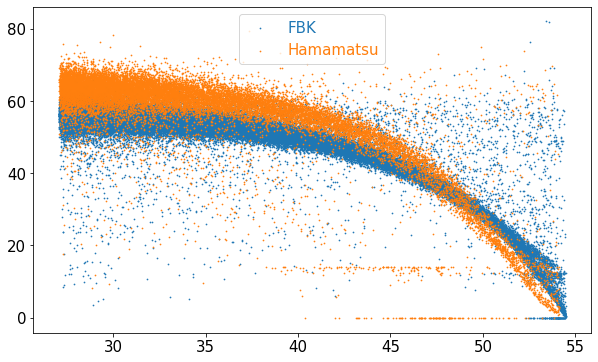

In [26]:
th = 2
plt.scatter(    true_z2_a[th],     var_x2_a[th], s=0.5, label='FBK')
plt.scatter(ham_true_z2_a[th], ham_var_x2_a[th], s=0.5, label='Hamamatsu')
plt.legend()

## Change colors in legend
t1, t2 = plt.legend().get_texts()
t1.set_color("C0")
t2.set_color("C1")

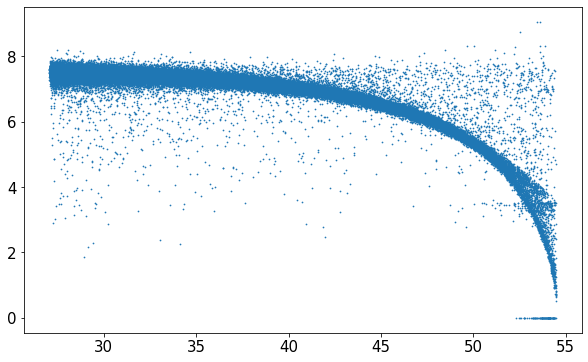

In [27]:
plt.scatter(true_z2_a[th], np.sqrt(var_x2_a[th]), s=0.5);

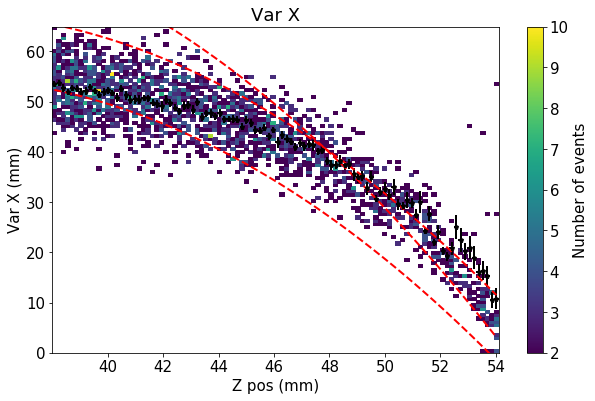

In [45]:
## To be adjusted...

z_lim, varx_lim = (38., 54.1), (0, 65)
Zbins, Vbins = 100, 100

thr  = 2
sel2 = in_range(true_z2_a[thr], *z_lim) & in_range(var_x2_a[thr], *varx_lim)
z, v = true_z2_a[thr][sel2], var_x2_a[thr][sel2]

plt.rcParams["figure.figsize"] = 10, 6
plt.hist2d(z, v, (Zbins, Vbins), cmin=2)

x, y, yu = fitf.profileX(z, v, Zbins, z_lim, drop_nan=False)
plt.errorbar(x, y, yu, np.diff(x)[0]/2, fmt="kp", ms=5, lw=2)
plt.title('Var X')
plt.xlabel('Z pos (mm)')
plt.ylabel('Var X (mm)')
plt.colorbar().set_label("Number of events")


#line  = (-0.13813199)*x*x + (9.34355559)*x -101.1623518#  + 0.8
line2 = (-0.13813199)*x*x + (9.34355559)*x -101.1623518  - 2
line3 = (-0.13813199)*x*x + (9.34355559)*x -101.1623518 + 11
line4 = (-0.15      )*x*x + (9.2       )*x -101.1623518 + 45
#plt.plot(x, line, color='r', linestyle='--', linewidth=2)
plt.plot(x, line2, color='r', linestyle='--', linewidth=2)
plt.plot(x, line3, color='r', linestyle='--', linewidth=2)
plt.plot(x, line4, color='r', linestyle='--', linewidth=2)
plt.show()